# Install the [hotsline](https://github.com/AntoineGrimaldi/hotsline) package

In [1]:
%cd /home/antoine/homhots/
!git clone git@github.com:AntoineGrimaldi/hotsline.git
%cd hotsline/
!python3 -m pip install --user -r requirements.txt
!python3 -m pip install --user -e .
%cd ../aprovhots/tutorials/

/home/antoine/homhots
fatal: destination path 'hotsline' already exists and is not an empty directory.
/home/antoine/homhots/hotsline
Obtaining file:///home/antoine/homhots/hotsline
  Preparing metadata (setup.py) ... done
  Attempting uninstall: hots
    Found existing installation: hots 1.0
    Uninstalling hots-1.0:
      Successfully uninstalled hots-1.0
  Running setup.py develop for hots
/home/antoine/homhots/aprovhots/tutorials


In [2]:
import tonic, os
from hots.utils import get_loader
from hots.network import network

# Make a trial of the package with Poker DVS

In [3]:
import tonic, torch, os
from hots.timesurface import timesurface
from hots.network import network
from hots.utils import get_loader, make_histogram_classification, HOTS_Dataset

print(f'Number of GPU devices available: {torch.cuda.device_count()}')
for N_gpu in range(torch.cuda.device_count()):
    print(f'GPU {N_gpu+1} named {torch.cuda.get_device_name(N_gpu)}')

Number of GPU devices available: 1
GPU 1 named GeForce RTX 2080 Ti


In [4]:
transform = tonic.transforms.NumpyAsType(int)
trainset = tonic.datasets.POKERDVS(save_to='../../Data/', train=True, transform=transform)
testset = tonic.datasets.POKERDVS(save_to='../../Data/', train=False, transform=transform)
trainloader = get_loader(trainset)
testloader = get_loader(testset)
num_sample_train = len(trainloader)
num_sample_test = len(testloader)
print(f'number of samples in the training set: {len(trainloader)}')
print(f'number of samples in the testing set: {len(testloader)}')

number of samples in the training set: 48
number of samples in the testing set: 20


## Initialization of the network

In [5]:
name = 'homeohots'
homeo = True
timestr = '2022-05-18'
dataset_name = 'poker'

Rz = [2, 4]
N_neuronz = [8, 16]
tauz = [1e3, 4e3]

hots = network(name, dataset_name, timestr, trainset.sensor_size, nb_neurons = N_neuronz, tau = tauz, R = Rz, homeo = homeo)

device -> cuda


## Unsupervised clustering

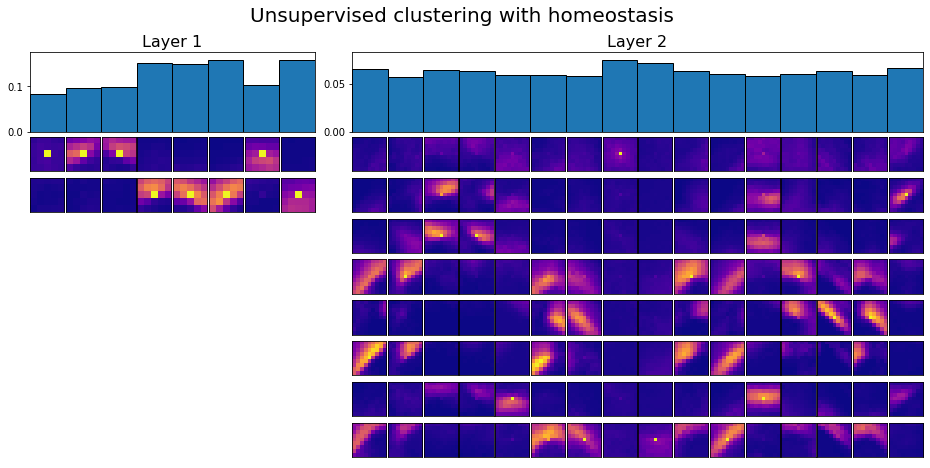

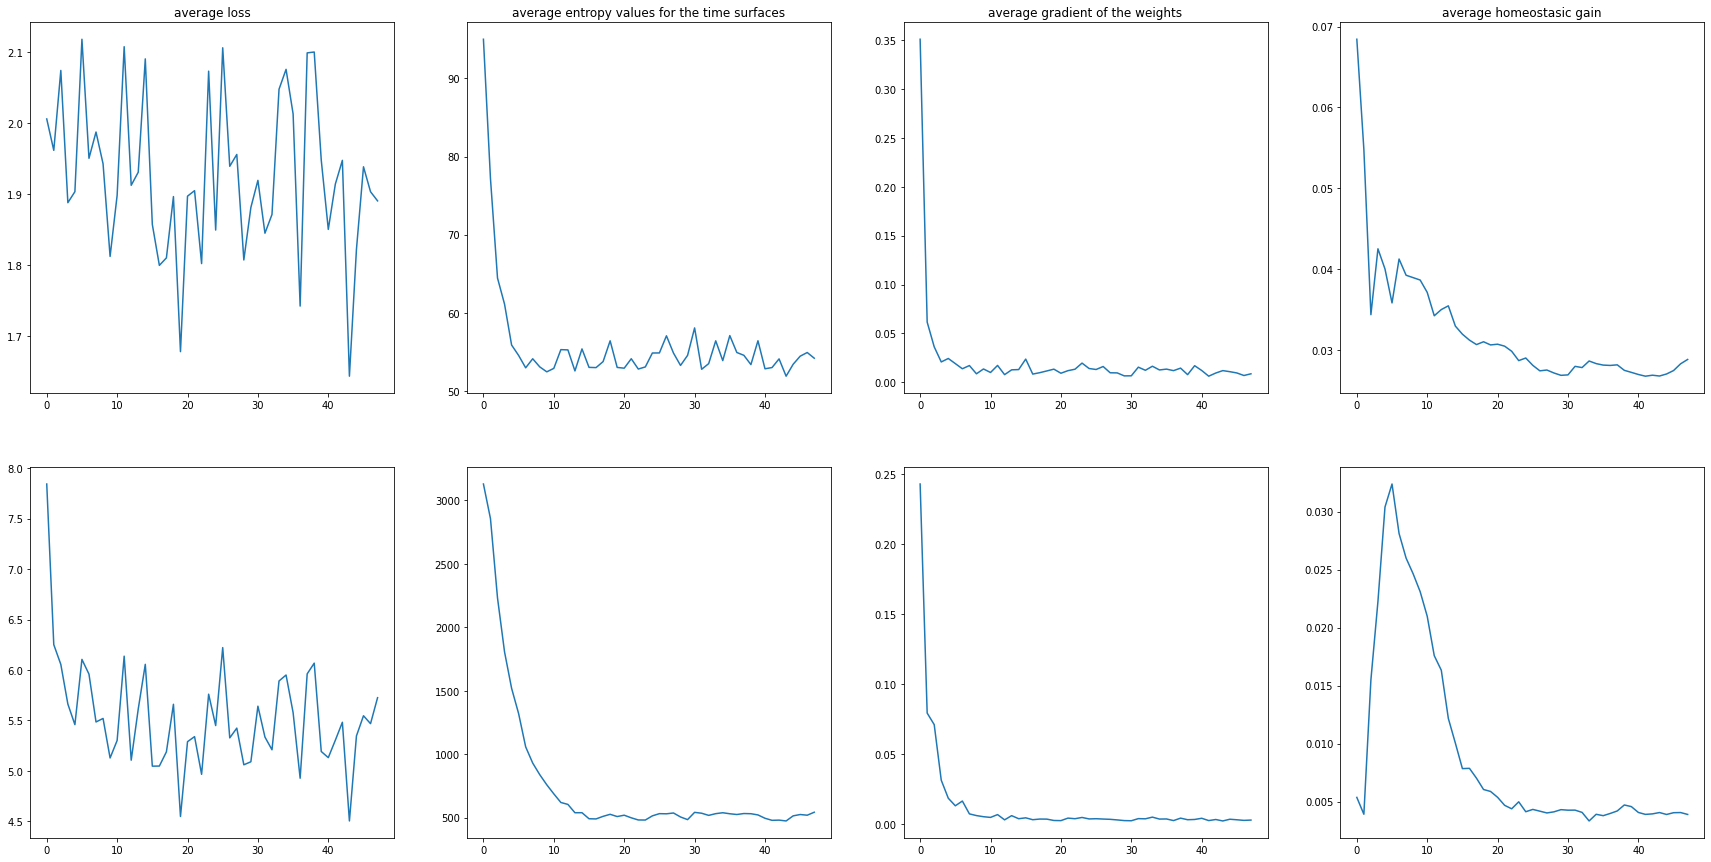

In [6]:
if not os.path.exists('../Records/'):
    os.mkdir('../Records/')
    os.mkdir('../Records/networks/')
    os.mkdir('../Records/LR_results/')
path = '../Records/networks/'+hots.name+'.pkl'
if not os.path.exists(path):
    hots.clustering(trainloader, trainset.ordering, record = True)
hots.plotlayers();
hots.plotlearning();

## Coding of the training and testing set

In [7]:
hots.coding(trainloader, trainset.ordering, trainset.classes, training=True)
hots.coding(testloader, trainset.ordering, trainset.classes, training=False)

this dataset have already been processed, check at: 
 ../Records/output/train/2022-05-18_poker_homeohots_True_[8, 16]_[1000.0, 4000.0]_[2, 4]_48_(None, None)/
this dataset have already been processed, check at: 
 ../Records/output/test/2022-05-18_poker_homeohots_True_[8, 16]_[1000.0, 4000.0]_[2, 4]_20_(None, None)/


## Classification with histogram (post-hoc)

In [8]:
jitter = (None, None)

train_path = f'../Records/output/train/{hots.name}_{num_sample_train}_{jitter}/'
test_path = f'../Records/output/test/{hots.name}_{num_sample_test}_{jitter}/'

testset = HOTS_Dataset(test_path, trainset.sensor_size, transform=transform, dtype=trainset.dtype)
trainset = HOTS_Dataset(train_path, trainset.sensor_size, transform=transform, dtype=trainset.dtype)

score = make_histogram_classification(trainset, testset, N_neuronz[-1])
print(f' Accuracy: {score*100}%')

 Accuracy: 100.0%
